In [22]:
import os
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter

In [23]:
path = '../data/other/corporas/discowug/data/{}/judgments.csv'
# data/other/corporas/discowug/data/abspalten/judgments.csv
data_dict = {}
dirs = os.listdir('../data/other/corporas/discowug/data/')

In [24]:
for _dir in dirs:
    with open(path.format(_dir), 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            # id1, id2, annotator, judgement
            if row[0] != 'identifier1': 
                id1, id2 = sorted(row[:2])
                if data_dict.get((id1, id2), None) is None:
                    data_dict[(id1, id2)] = []
                data_dict[(id1, id2)].append(row[2:4])
    file.close()
# data_dict

1.1051565059929291


[20886, 2183, 119, 6]

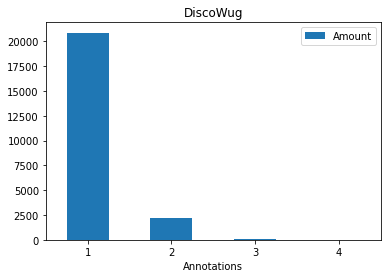

In [29]:
data_len = []
for k, v in data_dict.items():
    data_len.append(len(v))    
print(np.mean(data_len))

counter = dict(sorted(Counter(data_len).items(), key=lambda pair: pair[0]))

x: list = []
y: list = []
for k, v in counter.items():
    x.append(k)
    y.append(v)

x, y

df = pd.DataFrame({'Annotations': x, 'Amount': y})
ax = df.plot.bar(x='Annotations', y='Amount', title='DiscoWug', rot=0)
y

In [26]:
def multiple_annotations(data_dict: dict, min_annotations: int):
    multiple_annotations_var_eq = []
    multiple_annotations_var_geq = []

    for k, v in data_dict.items():
        if len(v) == min_annotations:
            tmp = []
            for ann in v:
                tmp.append(int(float(ann[1])))
            multiple_annotations_var_eq.append(np.var(tmp))

        if len(v) >= min_annotations:
            tmp = []
            for ann in v:
                tmp.append(int(float(ann[1])))
            multiple_annotations_var_geq.append(np.var(tmp))
    return multiple_annotations_var_eq, multiple_annotations_var_geq

var_eq, var_geq = multiple_annotations(data_dict, 2)

print('First few var:\n', var_geq[:10])
print('Mean of the variances: ', np.mean(var_geq))

First few var:
 [0.25, 0.2222222222222222, 0.0, 0.25, 0.0, 0.0, 2.0, 0.25, 0.25, 0.0]
Mean of the variances:  0.35123603889851723


In [27]:
x = list(range(2, 5))
y = [np.mean(multiple_annotations(data_dict, i)[0]) for i in range(2, 5)]

print('Annotations', x, '\nVariance', y)


Annotations [2, 3, 4] 
Variance [0.34310581768208886, 0.48552754435107376, 0.6458333333333334]


([<matplotlib.axis.XTick at 0x7f26653ac4c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

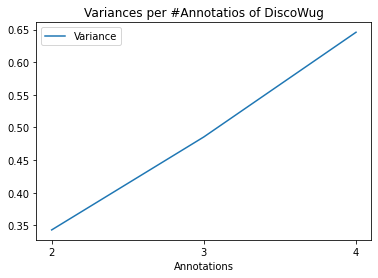

In [28]:
df = pd.DataFrame({'Annotations': x, 'Variance': y})
ax = df.plot.line(x='Annotations', y='Variance', title='Variances per #Annotatios of DiscoWug')
plt.xticks([2, 3, 4])